In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df_heart = pd.read_csv(r"C:\Users\Keara\Downloads\Intro_Data_Science_with_Python\heart.csv")

In [3]:
df_heart.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
x = df_heart.iloc[:, : -1]
y = df_heart.iloc[:, -1]

In [5]:
#number of yes-no
counter = Counter(y)
print(counter)


Counter({1: 165, 0: 138})


In [6]:
#select two features
x = df_heart[['age', 'chol']] 

In [7]:
#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [8]:
#feature scaling - based on eucledian distance
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.fit_transform(x_test)

In [9]:
#fit SVM model to training set
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0) #sigmoid
svm.fit(x_train, y_train)

SVC(random_state=0)

In [10]:
#predict the results on test set
y_pred = svm.predict(x_test)

In [11]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [12]:
print(cm)

[[26 23]
 [11 41]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


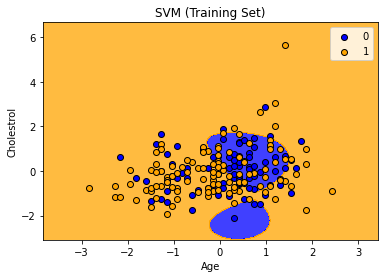

In [13]:
#Visualize train set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                                 alpha = 0.75, cmap  = ListedColormap(('blue', 'orange')))
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('blue', 'orange'))(i), label = j, edgecolors='black')
plt.title('SVM (Training Set)')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


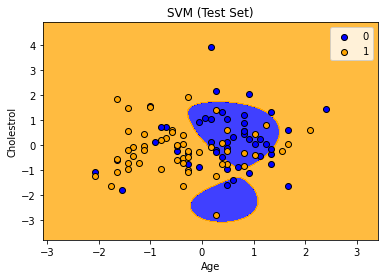

In [14]:
#Visualize test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                                 alpha = 0.75, cmap  = ListedColormap(('blue', 'orange')))
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('blue', 'orange'))(i), label = j, edgecolors='black')
plt.title('SVM (Test Set)')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.legend()
plt.show()

In [15]:
df_heart = pd.read_csv(r"C:\Users\Keara\Downloads\Intro_Data_Science_with_Python\heart.csv")

In [16]:
from sklearn.utils import shuffle
df_heart = shuffle(df_heart)

In [17]:
x = df_heart.iloc[:, : -1]
y = df_heart.iloc[:, -1]

In [18]:
#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [20]:
#fit SVM model to training set
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0) 
svm.fit(x_train, y_train)

SVC(random_state=0)

In [21]:
#predict the results on test set
y_pred = svm.predict(x_test)

In [22]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [23]:
print(cm)

[[18 29]
 [14 40]]


In [24]:
acc = sum(y_pred == y_test) / y_test.shape[0]


In [25]:
print(acc)

0.5742574257425742


In [26]:
#cost versus accuracy
accuracy = np.zeros(10)
j = 0

for i in range(1, 50, 5):
   svm = SVC(kernel = 'linear', random_state = 0, C = i) 
   svm.fit(x_train, y_train) 
    
   y_pred = svm.predict(x_test)
    
   #finding error
   accuracy[j] = sum(y_pred == y_test) / y_test.shape[0]
   j = j + 1


In [ ]:
plt.scatter(range(1, 50, 5), accuracy, color = 'red')
plt.plot(range(1, 50, 5), accuracy, color = 'blue')
plt.xlabel('cost')
plt.ylabel('accuracy')
plt.show()

In [28]:
from matplotlib.colors import Normalize
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [29]:
# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))



In [30]:
df_heart = pd.read_csv(r"C:\Users\Keara\Downloads\Intro_Data_Science_with_Python\heart.csv")

In [31]:
#shuffle
from sklearn.utils import shuffle
df_heart = shuffle(df_heart)

In [32]:
df_heart.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0


In [34]:
x = df_heart.iloc[:, : -1]
y = df_heart.iloc[:, -1]

In [35]:
#feature scaling - based on eucledian distance
scx = StandardScaler()
x = scx.fit_transform(x)

In [37]:
# Train classifiers
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(x, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [38]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10000.0, 'gamma': 0.0001} with a score of 0.84


In [39]:
# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(x, y)
        classifiers.append((C, gamma, clf))



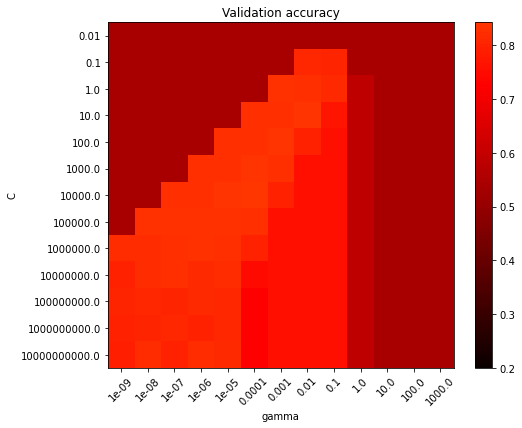

In [40]:
# #############################################################################
# Visualization

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()